Projeto de transmissão de energia wireless
Eletromag

# Alunos:
<li> Antônio Amaral
<li> Ariel Leventhal
<li> Arthur Barreto
<li> Felipe Catapano

In [1]:
# imports
from capacitor import Capacitor
from indutor import Indutor
from utils import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

Vamos definir os valores dos resistores, indutores e capacitores

In [3]:
r1 = 22.63 
r2 = 16.73
rc = 10
f = 1e4
l1 = Indutor(indutancia=15.02e-3,frequencia=f)
l2 = Indutor(indutancia=19.53e-3,frequencia=f)
c1 = Capacitor(capacitancia=12.5e-9,frequencia=f)
c2 = Capacitor(capacitancia=12.5e-9,frequencia=f) 

k = 0.2

A seguir temos a imagem do circuito 

<img src="circuito.jpeg">

Vamos definir o valor de zeq, o pararelo entre Rc e C2

In [4]:
zeq = paralelo(rc,c2.reatancia())
print(f"Zeq = {zeq}")

Zeq = (9.999383187773011-0.07853497190784244j)


Calculando o valor da reatancia da indutancia mutua

In [5]:
Xm = k*np.sqrt(np.multiply(l1.reatancia(),l2.reatancia()))
print(f"xm = {Xm}")

xm = 215.22660344030683j


Calculando a frequencia de ressonancia

In [6]:
freqR = np.divide(np.sqrt(np.divide(1, np.multiply(l1.indutancia,c1.capacitancia))),np.multiply(2,np.pi))
print(f"freqR = {freqR} Hz")

freqR = 11615.292713631998 Hz


In [7]:
def CalcularTransformador(v1):
    Z=np.array([[r1+l1.reatancia() + c1.reatancia(), -Xm],[-Xm, l2.reatancia()+r2+zeq]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [8]:
i1,i2 = CalcularTransformador(v1=5)
print(f"i1 = {i1}")
print(f"i2 = {i2}")

i1 = (0.0008659335999456253+0.013559812952020973j)
i2 = (0.00010002954688040403+0.0023806361967147983j)


In [9]:
lisF = np.arange(1,freqR+10000,1)
lisI1 = []
lisI2 = []
lisPc = []
lisEfic = []
v1 = (2/np.pi)*55
for f in lisF:
    l1.frequencia = f
    l2.frequencia = f
    c1.frequencia = f
    c2.frequencia = f
    zeq = paralelo(rc,c2.reatancia())
    xm = k*np.sqrt(np.multiply(l1.reatancia(),l2.reatancia()))
    i1,i2 = CalcularTransformador(v1=v1)
    lisI1.append(abs(i1))
    lisI2.append(abs(i2))
    pc = (i2*zeq*i2.conjugate()/2).real
    lisPc.append(pc)
    pf = i1.conjugate()*v1/2
    lisEfic.append(pc.real/pf.real)

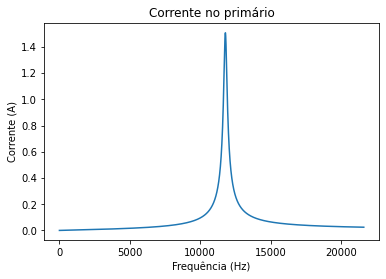

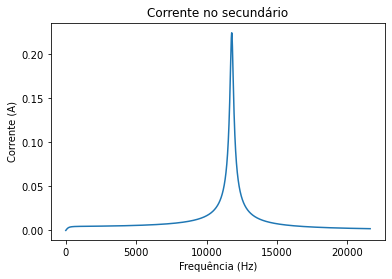

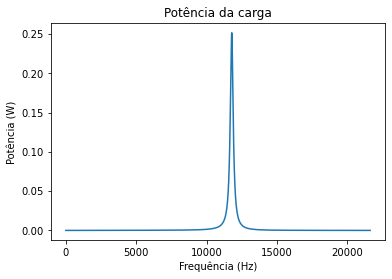

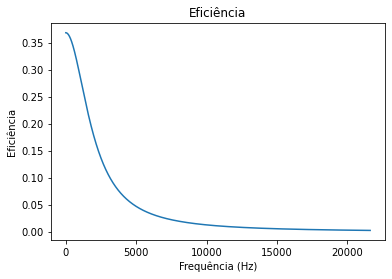

In [10]:
plt.plot(lisF,lisI1)
plt.title("Corrente no primário")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(lisF,lisI2)
plt.title("Corrente no secundário")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(lisF,lisPc)
plt.title("Potência da carga")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")
plt.savefig("potenciaCarga.png", dpi = 1200)
plt.show()

plt.plot(lisF,lisEfic)
plt.title("Eficiência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Eficiência")
plt.show()

Fixando a frequência no valor da frequencia de ressonancia

In [11]:
f = freqR
l1.frequencia = f
l2.frequencia = f
c1.frequencia = f
c2.frequencia = f
lisVp = []
lisK = np.arange(0,1,1e-6)
for k in lisK:
    Xm = k*np.sqrt(np.multiply(l1.reatancia(),l2.reatancia()))
    zeq = paralelo(rc,c2.reatancia())
    i1,i2 = CalcularTransformador(v1=v1)
    vc = (i2*zeq*i2.conjugate()/2).real
    lisVp.append(vc)
    

PLotando o gráfico do Vp em função do valor de K

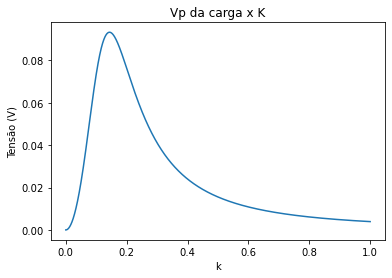

In [12]:
plt.plot(lisK,lisVp)
plt.title("Vp da carga x K")
plt.xlabel("k")
plt.ylabel("Tensão (V)")
plt.savefig("valores de K.png", dpi = 1200)
plt.show()

In [15]:
print(f'Vmax = {np.max(lisVp)} V')

Vmax = 0.09325584235678466 V


In [16]:
for i in range(len(lisVp)):
    if lisVp[i] == 0.09325584235678466:
        print(f'k otimo = {lisK[i]}')
        break

k otimo = 0.14368999999999998


# Validando o Experimento

<li> ifonte = 0.03 A
<li> vfonte = 55 V
<li> pfonte = ifonte*vfonte = 1.65 W


## Dados Carga
<img src="final.jpeg" width=1000 height=700>

In [19]:
pCarga = (951e-3)**2/(100)
print(f"PotCarga = {pCarga*1e3 :.3f} mW")

PotCarga = 9.044 mW


### Eficiência

In [22]:
pFonte = 3e-2*55
eta = pCarga/pFonte

print(f'Eficiência = {eta*100 :.3f} %')

Eficiência = 0.548 %


In [23]:
for i in range(len(lisF)):
    if lisF[i] == 10000:
        print(f'Eficiência = {lisEfic[i]*100 :.3f} %')

Eficiência = 1.311 %


Os valores diferem devido a perdas no circuito, bem como a resitencia da solda e outros fatores, sendo valido considerar que o modelo foi validado